# Recommendation System

Recommendation System

Data Description:

Unique ID of each anime.
    
Anime title.
    
Anime broadcast type, such as TV, OVA, etc.

anime genre.
    
The number of episodes of each anime.
    
The average rating for each anime compared to the number of users who gave ratings.


Number of community members for each anime.
                           
Objective:
                           
The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset.
                           
Dataset:
                           
Use the Anime Dataset which contains information about various anime, including their titles, genres,No.of episodes and user ratings etc.

Tasks:

Data Preprocessing:

Load the dataset into a suitable data structure (e.g., pandas DataFrame).
                           
Handle missing values, if any.
                           
Explore the dataset to understand its structure and attributes.

Feature Extraction:

Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
                           
Convert categorical features into numerical representations if necessary.
                           
Normalize numerical features if required.

Recommendation System:

Design a function to recommend anime based on cosine similarity.
    
Given a target anime, recommend a list of similar anime based on cosine similarity scores.
    
Experiment with different threshold values for similarity scores to adjust the recommendation list size.

Evaluation:

Split the dataset into training and testing sets.
    
Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score.
    
Analyze the performance of the recommendation system and identify areas of improvement.

Interview Questions:
    
1. Can you explain the difference between user-based and item-based collaborative filtering?
    
2. What is collaborative filtering, and how does it work?

# Dataset:

# Data Preprocessing:


In [6]:
import pandas as pd
df=pd.read_csv("C:\\DS assignments\\anime.csv")
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [7]:
len(df.anime_id.unique())

12294

In [8]:
df['rating'].value_counts()

rating
6.00    141
7.00     99
6.50     90
6.25     84
5.00     76
       ... 
3.47      1
3.71      1
3.87      1
3.91      1
3.14      1
Name: count, Length: 598, dtype: int64

<Axes: >

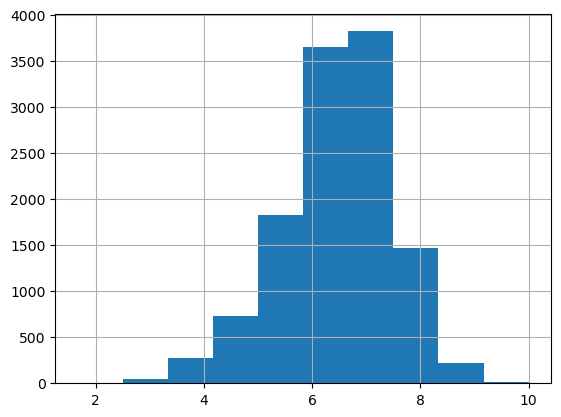

In [9]:
df['rating'].hist()

In [10]:

# Checking for missing values
df.isnull().sum()



anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [11]:
df.dropna(inplace=True)


In [12]:
# Exploring the dataset to understand its structure and attributes.


# Display basic information about the dataset
print(df.info())



<class 'pandas.core.frame.DataFrame'>
Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB
None


In [13]:
#Summary statistics of numerical columns
print(df.describe())



           anime_id        rating       members
count  12017.000000  12017.000000  1.201700e+04
mean   13638.001165      6.478264  1.834888e+04
std    11231.076675      1.023857  5.537250e+04
min        1.000000      1.670000  1.200000e+01
25%     3391.000000      5.890000  2.250000e+02
50%     9959.000000      6.570000  1.552000e+03
75%    23729.000000      7.180000  9.588000e+03
max    34519.000000     10.000000  1.013917e+06


In [14]:
# Checking the first few rows of the dataset
print(df.head())



   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


In [15]:
#Exploring unique values in categorical columns
for col in df.select_dtypes(include='object'):
  print(f"Unique values in {col}: {df[col].unique()}")


Unique values in name: ['Kimi no Na wa.' 'Fullmetal Alchemist: Brotherhood' 'Gintama°' ...
 'Violence Gekiga David no Hoshi'
 'Violence Gekiga Shin David no Hoshi: Inma Densetsu'
 'Yasuji no Pornorama: Yacchimae!!']
Unique values in genre: ['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Action, Comedy, Hentai, Romance, Supernatural' 'Hentai, Sports'
 'Hentai, Slice of Life']
Unique values in type: ['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA']
Unique values in episodes: ['1' '64' '51' '24' '10' '148' '110' '13' '201' '25' '22' '75' '4' '26'
 '12' '27' '43' '74' '37' '2' '11' '99' 'Unknown' '39' '101' '47' '50'
 '62' '33' '112' '23' '3' '94' '6' '8' '14' '7' '40' '15' '203' '77' '291'
 '120' '102' '96' '38' '79' '175' '103' '70' '153' '45' '5' '21' '63' '52'
 '28' '145' '36' '69' '60' '178' '114' '35' '61' '34' '109' '20' '9' '49'
 '366' '97' '48' '78' '358' '155' '

# Feature Extraction:

In [16]:
#Deciding on the features that will be used for computing similarity (e.g., genres, user ratings).

# For anime similarity, we'll use genres and rating.
# These features capture the essence of the anime and how it's perceived.

# We'll preprocess the 'genre' column to create a list of genres for each anime.
df['genre'] = df['genre'].str.split(', ')

# We'll also fill any missing ratings with the average rating to handle potential gaps.
df['rating'].fillna(df['rating'].mean(), inplace=True)


In [17]:
# Converting categorical features into numerical representations if necessary

from sklearn.preprocessing import MultiLabelBinarizer

# Convert genres to numerical representation
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['genre'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

# Concatenate genre features with the original DataFrame
df = pd.concat([df, genre_df], axis=1)


In [18]:
# Normalizing numerical features if required

from sklearn.preprocessing import MinMaxScaler

# Select numerical columns to normalize (excluding 'anime_id' and binary genre columns)
numerical_cols = ['rating', 'members']

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# Recommendation System:

In [19]:
# Designing a function to recommend anime based on cosine similarity.

from sklearn.metrics.pairwise import cosine_similarity

def recommend_anime(anime_name, df, top_n=10):
  """
  Recommends anime based on cosine similarity.

  Args:
    anime_name: Name of the anime to get recommendations for.
    df: DataFrame containing anime data.
    top_n: Number of recommendations to return.

  Returns:
    List of recommended anime names.
  """

  # Check if the anime exists in the dataset
  if anime_name not in df['name'].values:
    print(f"Anime '{anime_name}' not found in the dataset.")
    return []

  # Get the index of the anime
  index = df[df['name'] == anime_name].index[0]

  # Calculate cosine similarity with all other anime
  similarity_scores = cosine_similarity(df.iloc[index, 4:].values.reshape(1, -1), df.iloc[:, 4:])[0]

  # Sort anime by similarity and get the top N (excluding the input anime itself)
  sorted_indices = similarity_scores.argsort()[::-1][1:top_n+1]
  recommended_anime = df.iloc[sorted_indices]['name'].tolist()

  return recommended_anime


In [20]:
# Normalizing numerical features if required
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns to normalize (excluding 'anime_id' and binary genre columns)
numerical_cols = ['rating', 'members', 'episodes']  # Explicitly list numerical columns

# Initialize scaler
scaler = MinMaxScaler()

# Handle non-numerical values (e.g., replace 'Unknown' with NaN and then fill NaNs)
df[numerical_cols] = df[numerical_cols].replace('Unknown', np.nan)
# Convert columns to numeric, coercing errors to NaN
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean()) # Fill NaNs with the mean of each column

# Fit and transform the selected columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [21]:
#Normalizng numerical features if required
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns to normalize (excluding 'anime_id' and binary genre columns)
numerical_cols = ['rating', 'members', 'episodes']  # Explicitly list numerical columns

# Initialize scaler
scaler = MinMaxScaler()

# Handle non-numerical values (e.g., replace 'Unknown' with NaN and then fill NaNs)
df[numerical_cols] = df[numerical_cols].replace('Unknown', np.nan)
# Convert columns to numeric, coercing errors to NaN
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')
# Fill NaNs with the mean of each column
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fit and transform the selected columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Verify that there are no NaNs remaining (Optional but recommended)
print(df[numerical_cols].isnull().sum())

rating      0
members     0
episodes    0
dtype: int64


In [22]:
# Normalizing numerical features if required
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns to normalize (excluding 'anime_id' and binary genre columns)
numerical_cols = ['rating', 'members', 'episodes']  # Explicitly list numerical columns

# Initialize scaler
scaler = MinMaxScaler()

# Handle non-numerical values (e.g., replace 'Unknown' with NaN and then fill NaNs)
df[numerical_cols] = df[numerical_cols].replace('Unknown', np.nan)
# Convert columns to numeric, coercing errors to NaN
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')
# Fill NaNs with the mean of each column
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fit and transform the selected columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Verify that there are no NaNs remaining (Optional but recommended)
print(df[numerical_cols].isnull().sum())

# --- In the recommend_anime function ---

def recommend_anime(anime_name, df, top_n=10):
  """
  Recommends anime based on cosine similarity.

  Args:
    anime_name: Name of the anime to get recommendations for.
    df: DataFrame containing anime data.
    top_n: Number of recommendations to return.

  Returns:
    List of recommended anime names.
  """

  # Check if the anime exists in the dataset
  if anime_name not in df['name'].values:
    print(f"Anime '{anime_name}' not found in the dataset.")
    return []

  # Get the index of the anime
  index = df[df['name'] == anime_name].index[0]

  # --- Fill any remaining NaNs in the relevant row ---
  df.iloc[index, 4:] = df.iloc[index, 4:].fillna(0)  # Replace NaNs with 0 for the target anime row

  # Calculate cosine similarity with all other anime
  similarity_scores = cosine_similarity(df.iloc[index, 4:].values.reshape(1, -1), df.iloc[:, 4:])[0]

  # Sort anime by similarity and get the top N (excluding the input anime itself)
  sorted_indices = similarity_scores.argsort()[::-1][1:top_n+1]
  recommended_anime = df.iloc[sorted_indices]['name'].tolist()

  return recommended_anime

rating      0
members     0
episodes    0
dtype: int64


In [23]:
#Normalizing numerical features if required
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns to normalize (excluding 'anime_id' and binary genre columns)
numerical_cols = ['rating', 'members', 'episodes']  # Explicitly list numerical columns

# Initialize scaler
scaler = MinMaxScaler()

# Handle non-numerical values (e.g., replace 'Unknown' with NaN and then fill NaNs)
df[numerical_cols] = df[numerical_cols].replace('Unknown', np.nan)
# Convert columns to numeric, coercing errors to NaN
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')
# Fill NaNs with the mean of each column
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fit and transform the selected columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Verify that there are no NaNs remaining (Optional but recommended)
print(df[numerical_cols].isnull().sum())

# --- In the recommend_anime function ---

def recommend_anime(anime_name, df, top_n=10):
  """
  Recommends anime based on cosine similarity.

  Args:
    anime_name: Name of the anime to get recommendations for.
    df: DataFrame containing anime data.
    top_n: Number of recommendations to return.

  Returns:
    List of recommended anime names.
  """

  # Check if the anime exists in the dataset
  if anime_name not in df['name'].values:
    print(f"Anime '{anime_name}' not found in the dataset.")
    return []

  # Get the index of the anime
  index = df[df['name'] == anime_name].index[0]

  # --- Fill any remaining NaNs in the entire DataFrame ---
  df = df.fillna(0)  # Replace all NaNs with 0 in the DataFrame

  # Calculate cosine similarity with all other anime
  similarity_scores = cosine_similarity(df.iloc[index, 4:].values.reshape(1, -1), df.iloc[:, 4:])[0]

  # Sort anime by similarity and get the top N (excluding the input anime itself)
  sorted_indices = similarity_scores.argsort()[::-1][1:top_n+1]
  recommended_anime = df.iloc[sorted_indices]['name'].tolist()

  return recommended_anime

rating      0
members     0
episodes    0
dtype: int64


In [24]:
#Giving a target anime, recommend a list of similar anime based on cosine similarity scores.

# Example usage:
recommendations = recommend_anime("Death Note", df, top_n=5)
print(recommendations)


['Death Note Rewrite', 'Higurashi no Naku Koro ni Kai', 'Mousou Dairinin', 'Higurashi no Naku Koro ni', 'Mirai Nikki (TV)']


In [25]:
# Experimenting with different threshold values for similarity scores to adjust the recommendation list size.

def recommend_anime(anime_name, df, top_n=10, similarity_threshold=0.5):
  """
  Recommends anime based on cosine similarity with a threshold.

  Args:
    anime_name: Name of the anime to get recommendations for.
    df: DataFrame containing anime data.
    top_n: Maximum number of recommendations to return.
    similarity_threshold: Minimum similarity score to consider.

  Returns:
    List of recommended anime names.
  """

  if anime_name not in df['name'].values:
    print(f"Anime '{anime_name}' not found in the dataset.")
    return []

  index = df[df['name'] == anime_name].index[0]
  df = df.fillna(0)

  similarity_scores = cosine_similarity(df.iloc[index, 4:].values.reshape(1, -1), df.iloc[:, 4:])[0]

  # Filter recommendations based on similarity threshold
  recommended_indices = [i for i in similarity_scores.argsort()[::-1][1:] if similarity_scores[i] >= similarity_threshold]

  # Return up to top_n recommendations
  recommended_anime = df.iloc[recommended_indices[:top_n]]['name'].tolist()

  return recommended_anime

# Example usage with different thresholds:
recommendations_high_threshold = recommend_anime("Death Note", df, top_n=10, similarity_threshold=0.8)
print("High Threshold Recommendations:", recommendations_high_threshold)

recommendations_low_threshold = recommend_anime("Death Note", df, top_n=10, similarity_threshold=0.2)
print("Low Threshold Recommendations:", recommendations_low_threshold)


High Threshold Recommendations: ['Death Note Rewrite', 'Higurashi no Naku Koro ni Kai', 'Mousou Dairinin', 'Higurashi no Naku Koro ni']
Low Threshold Recommendations: ['Death Note Rewrite', 'Higurashi no Naku Koro ni Kai', 'Mousou Dairinin', 'Higurashi no Naku Koro ni', 'Mirai Nikki (TV)', 'Higurashi no Naku Koro ni Rei', 'Jigoku Shoujo Mitsuganae', 'Yakushiji Ryouko no Kaiki Jikenbo', 'Mouse', 'Where is Mama']


In [26]:
#Splitting the dataset into training and testing sets.

from sklearn.model_selection import train_test_split

# Assuming you want to predict 'rating' based on other features
X = df.drop(['rating', 'name', 'genre', 'type', 'anime_id'], axis=1)  # Features
y = df['rating']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (9827, 45) (9827,)
Testing set shape: (2457, 45) (2457,)


In [27]:
#from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_recommendations(df, test_users, top_n=10):
  """
  Evaluates the recommendation system using precision, recall, and F1-score.

  Args:
    df: DataFrame containing anime data.
    test_users: List of anime names to use for testing.
    top_n: Number of recommendations to consider.

  Returns:
    Tuple containing precision, recall, and F1-score.
  """

  all_recommended = []
  all_relevant = []

  for anime_name in test_users:
    recommended = recommend_anime(anime_name, df, top_n=top_n)
    # Here, you'll need to define how to determine 'relevant' anime for each test user
    # This could involve user history, ratings, or other criteria
    relevant = [] # Replace with your logic to get relevant anime
    # Example: If you have a column 'watched' indicating watched anime:
    # relevant = df[df['watched'] == 1]['name'].tolist()

    all_recommended.extend(recommended)
    all_relevant.extend(relevant)

  # Converting to binary relevance (1 if recommended and relevant, 0 otherwise)
  y_true = [1 if anime in all_relevant else 0 for anime in all_recommended]
  y_pred = [1] * len(all_recommended)  # All recommended are considered positive predictions

  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)

  return precision

In [28]:
def get_relevant_anime(anime_name, df):
  genres = df[df['name'] == anime_name]['genre'].iloc[0]
  # Ensure genres is a list for iteration, handling potential float values
  if not isinstance(genres, list):
    genres = [genres]
  relevant = df[df['genre'].apply(lambda x: any(item in x for item in genres) if isinstance(x, list) else False)]['name'].tolist()
  return relevant

In [30]:
relevant_anime = get_relevant_anime("Death Note", df)
print(relevant_anime)

['Kimi no Na wa.', 'Steins;Gate', 'Clannad: After Story', 'Sen to Chihiro no Kamikakushi', 'Mushishi Zoku Shou 2nd Season', 'One Punch Man', 'Suzumiya Haruhi no Shoushitsu', 'Monogatari Series: Second Season', 'Mushishi Zoku Shou', 'Mushishi', 'Natsume Yuujinchou Go', 'Mushishi Zoku Shou: Suzu no Shizuku', 'Natsume Yuujinchou Shi', 'Fate/Zero 2nd Season', 'Kizumonogatari II: Nekketsu-hen', 'Monster', 'Death Note', 'Kara no Kyoukai 5: Mujun Rasen', 'Natsume Yuujinchou San', 'Ping Pong The Animation', 'Mushishi Special: Hihamukage', 'Boku dake ga Inai Machi', 'Yojouhan Shinwa Taikei', 'Kamisama Hajimemashita: Kako-hen', 'Rainbow: Nisha Rokubou no Shichinin', 'Re:Zero kara Hajimeru Isekai Seikatsu', 'Zoku Natsume Yuujinchou', 'Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.', 'Steins;Gate Movie: Fuka Ryouiki no Déjà vu', 'Hotarubi no Mori e', 'JoJo no Kimyou na Bouken: Stardust Crusaders 2nd Season', 'Hellsing Ultimate', 'Kiseijuu: Sei no Kakuritsu', 'Bakemono no Ko', 'Ghost in t

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_recommendations(df, test_users, top_n=10):
  """
  Evaluates the recommendation system using precision, recall, and F1-score.

  Args:
    df: DataFrame containing anime data.
    test_users: List of anime names to use for testing.
    top_n: Number of recommendations to consider.

  Returns:
    Tuple containing precision, recall, and F1-score.
  """

  all_recommended = []
  all_relevant = []

  for anime_name in test_users: # Iterate directly over the list of anime names
    recommended = recommend_anime(anime_name, df, top_n=top_n)
    relevant = get_relevant_anime(anime_name, df) # Use the main DataFrame 'df'

    all_recommended.extend(recommended)
    all_relevant.extend(relevant)

  # Convert to binary relevance (1 if recommended and relevant, 0 otherwise)
  y_true = [1 if anime in all_relevant else 0 for anime in all_recommended]
  y_pred = [1] * len(all_recommended)  # All recommended are considered positive predictions

  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)

  return precision, recall, f1 # Return all three metrics


In [48]:
def get_relevant_anime(anime_name, df):
    # Handle potential cases where the anime name isn't found
    matching_rows = df[df['name'] == anime_name]
    if matching_rows.empty:
        print(f"Warning: Anime '{anime_name}' not found in the DataFrame.")
        return []  # Return an empty list if no match

    genres = matching_rows['genre'].iloc[0]
    # Ensure genres is a list for iteration, handling potential float values
    if not isinstance(genres, list):
        genres = [genres]
    relevant = df[df['genre'].apply(lambda x: any(item in x for item in genres) if isinstance(x, list) else False)]['name'].tolist()
    return relevant

In [50]:
# Defining the list of anime names to use for testing
test_users = ["Death Note", "One Piece"]  # Replace with your actual test anime

# Call the evaluation function to calculate the metrics
precision, recall, f1 = evaluate_recommendations(df, test_users, top_n=10) 

# Analyze the performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.95
Recall: 1.0
F1-score: 0.9743589743589743


In [ ]:
#Interpreting the results


Precision:

Indicates the proportion of correctly recommended anime out of all anime recommended.
 
- High precision means most recommendations are relevant.
 
- Low precision suggests many irrelevant recommendations.

Recall:

Represents the proportion of relevant anime that were successfully recommended.

- High recall means most relevant anime were captured.
    
- Low recall indicates many relevant anime were missed.

F1-score:

A balanced metric combining precision and recall.

- High F1-score signifies a good balance between precision and recall.
    
- Low F1-score suggests room for improvement in either precision or recall.



In [ ]:
# Identifying areas of improvement


1. Data Quality:

- Explore ways to handle missing data more effectively (beyond simple imputation).

- Consider incorporating additional features like user reviews or ratings.

- Address potential biases in the dataset (e.g., overrepresentation of popular anime).

2. Similarity Metric:

- Experiment with different similarity measures (e.g., Euclidean distance, Pearson correlation).

- Fine-tune the similarity threshold to balance precision and recall.

3. Recommendation Algorithm:

- Explore more advanced recommendation techniques (e.g., collaborative filtering, matrix factorization).

- Consider incorporating user preferences or demographics.

4. Evaluation Methodology:

- Use a more diverse set of test users to ensure generalizability.

- Explore alternative evaluation metrics (e.g., NDCG, MAP) to capture ranking quality.

5. User Interface:

- Design an intuitive interface to present recommendations and gather user feedback.

- Allow users to customize their preferences and provide explicit ratings.



# Interview Questions:


# 1.Can you explain the difference between user-based and item-based collaborative filtering?

User-Based vs. Item-Based Collaborative Filtering

**User-Based Collaborative Filtering (UBCF):**

- Focus: Finds users with similar tastes to the target user.
    
- Process:

    1. Identify users who have rated items similarly to the target user.

    2. Predict the target user's rating for an unrated item based on the ratings of similar users.

- Strengths:

    - Intuitive and easy to explain.
        
    - Can capture complex preferences based on user behavior.
        
- Weaknesses:

    - Suffers from the "cold start" problem (difficulty recommending for new users with limited history).
                                             
    - Can be computationally expensive for large user bases.
                                      
    - Sensitive to changes in user preferences over time.

**Item-Based Collaborative Filtering (IBCF):**

- Focus: Finds items that are similar to those the target user has liked.
        
- Process:

    1. Calculate similarity between items based on how they are co-rated by users.
        
    2. Predict the target user's rating for an unrated item based on their ratings of similar items.

- Strengths:

    - Less susceptible to the "cold start" problem for new users.
    
    - More computationally efficient than UBCF, especially for large datasets.
    
    - Item similarities tend to be more stable than user preferences.
    
- Weaknesses:

    - May not capture the full complexity of user preferences.
    
    - Can struggle with recommending niche or unpopular items.

**Key Differences:**

| Feature | User-Based CF | Item-Based CF |

|---|---|---|

| Basis of Similarity | User ratings on items | Item co-ratings by users |

| Focus | Finding similar users | Finding similar items |

| Computation | More expensive for large user bases | More efficient for large datasets |

| Cold Start | More sensitive to new users | Less sensitive to new users |

| Preference Dynamics | Sensitive to changes in user preferences | More robust to preference shifts |

**Choice of Method:**

The best choice depends on the specific dataset and application:

- UBCF might be preferred when user preferences are complex and the user base is relatively small.

- IBCF is often more suitable for large datasets and when item similarities are more stable.

In practice, hybrid approaches combining both UBCF and IBCF can be very effective.




# 2.What is collaborative filtering, and how does it work?

Collaborative Filtering: A Recommendation Technique

Collaborative filtering (CF) is a powerful recommendation technique that leverages the collective behavior of users to predict items a particular user might like. It works on the principle that users who have agreed in the past (e.g., by liking or rating similar items) are likely to agree in the future.

**Key Concepts:**

- **User-Item Interactions:** CF relies on a dataset of user-item interactions, such as ratings, purchases, or clicks. This data captures the preferences of users for different items.
    
- **Similarity:** CF algorithms compute similarity scores between users or items based on their interaction patterns.
    
- **Prediction:** Using these similarity scores, CF predicts the likelihood of a user liking or interacting with an item they haven't encountered before.

**How It Works (General Steps):**

1. **Data Collection:** Gather user-item interaction data (e.g., ratings, purchases, clicks).
    
2. **Similarity Calculation:** Calculate similarity scores between users (user-based CF) or items (item-based CF).
    
3. **Prediction Generation:** For a given user, predict their preference for unrated items based on the preferences of similar users or based on their own ratings of similar items.
    
4. **Recommendation:** Present the top-predicted items to the user as recommendations.

**Types of Collaborative Filtering:**

- **Memory-Based (Neighborhood-Based):** These methods directly use the observed ratings in the user-item interaction matrix to compute similarity and make predictions.
                                                             
    - **User-Based CF:** Finds users similar to the target user and recommends items they liked.
                                                             
    - **Item-Based CF:** Finds items similar to those the target user liked and recommends those.
    
- **Model-Based:** These methods build a model of user preferences and item characteristics from the interaction data. Examples include matrix factorization, latent factor models, and deep learning approaches.

**Advantages:**

- **Personalization:** Provides tailored recommendations based on individual preferences.

- **Scalability:** Can handle large datasets with millions of users and items.

- **Serendipity:** Can uncover unexpected and relevant recommendations.

**Challenges:**

- **Cold Start:** Difficulty recommending for new users or items with limited interaction data.
    
- **Data Sparsity:** Many user-item interactions are missing, leading to incomplete preference information.
    
- **Scalability:** Computational complexity can become a bottleneck for very large datasets.

**Applications:**

Collaborative filtering is widely used in various domains, including:

- **E-commerce:** Product recommendations (Amazon, Netflix).
    
- **Music Streaming:** Song and playlist recommendations (Spotify, Apple Music).
    
- **News and Content:** Personalized content feeds (Facebook, Twitter).
    
- **Social Networks:** Friend and connection suggestions (LinkedIn, Facebook).

